In [87]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Обучение агента игре "Крестики-нолики" 

### Правила

По правилам право первого зода за крестиками Х - player_one
Вторым же ходят нолики О - player_two


In [88]:
reward = [0]

In [89]:
class State:
    def __init__(self, player_one, player_two):
        # метод инициализирует игровое поле, игроков, текущего игрока, 
        # победителя и статус окончания игры
        self.board = np.zeros((3, 3))
        self.player_one = player_one
        self.player_two = player_two
        self.isEnd = False
        self.boardHash = None
        self.playerSymbol = 1
        self.reward1 = [0]
        self.reward2 = [0]

    def getHash(self):
        self.boardHash = str(self.board.reshape(3*3))
        return self.boardHash

    def winner(self):
        # проверяем строки
        for i in range(3):
            if sum(self.board[i, :]) == 3:
                self.isEnd = True
                return 1
            if sum(self.board[i, :]) == -3:
                self.isEnd = True
                return -1

        for i in range(3):
            if sum(self.board[:, i]) == 3:
                self.isEnd = True
                return 1
            if sum(self.board[:, i]) == -3:
                self.isEnd = True
                return -1
        diag_sum1 = sum([self.board[i, i] for i in range(3)])
        diag_sum2 = sum([self.board[i, 3-i-1] for i in range(3)])
        diag_sum = max(diag_sum1, diag_sum2, key=abs)
        if diag_sum == 3:
            self.isEnd = True
            return 1
        if diag_sum == -3:
            self.isEnd = True
            return -1

        if len(self.availableSteps()) == 0:
            self.isEnd = True
            return 0

        self.isEnd = False
        return None

    def availableSteps(self):
        positions = []
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == 0:
                    positions.append((i, j)) 
        return positions

    def updateState(self, position):
        self.board[position] = self.playerSymbol
        # метод переключает текущего игрока на другого
        self.playerSymbol = -1 if self.playerSymbol == 1 else 1

    def giveReward(self):
        result = self.winner()
        if result == 1:
            self.player_one.feedReward(1)
            self.player_two.feedReward(0)
            self.reward1.append(self.reward1[-1] + 1)
            self.reward2.append(self.reward2[-1] - 1)
        elif result == -1:
            self.player_one.feedReward(0)
            self.player_two.feedReward(1)
            self.reward1.append(self.reward1[-1] - 1)
            self.reward2.append(self.reward2[-1] + 1)
        else:
            self.player_one.feedReward(0.1)
            self.player_two.feedReward(0.5)
            self.reward1.append(self.reward1[-1] + 0.1)
            self.reward2.append(self.reward2[-1] + 0.5)

    # метод сбрасывает игровое поле, текущего 
    # игрока, победителя и статус окончания игры к их первоначальным значениям
    def reset(self):
        self.board = np.zeros((3, 3))
        self.boardHash = None
        self.isEnd = False
        self.playerSymbol = 1

    def play(self, rounds=100):
        for i in range(rounds):
            if i%5000 == 0:
                print("Количество сыгранных игр: {}".format(i))
            while not self.isEnd:
                positions = self.availableSteps()
                p1_action = self.player_one.chooseAction(positions, self.board, self.playerSymbol)
                self.updateState(p1_action)
                board_hash = self.getHash()
                self.player_one.addState(board_hash)
                win = self.winner()
                if win is not None:
                    self.giveReward()
                    self.player_one.reset()
                    self.player_two.reset()
                    self.reset()
                    break
                else:
                    positions = self.availableSteps()
                    player_two_action = self.player_two.chooseAction(positions, self.board, self.playerSymbol)
                    self.updateState(player_two_action)
                    board_hash = self.getHash()
                    self.player_two.addState(board_hash)
                    win = self.winner()
                    if win is not None:
                        self.giveReward()
                        self.player_one.reset()
                        self.player_two.reset()
                        self.reset()
                        break

    # игра против человека
    def play2(self):
        while not self.isEnd:
            # Player 1
            positions = self.availableSteps()
            p1_action = self.player_one.chooseAction(positions, self.board, self.playerSymbol)
            # выполняем действие и обновляем состояние поля
            self.updateState(p1_action)
            self.showDesk()
            win = self.winner()
            if win is not None:
                if win == 1:
                    print(self.player_one.name, "выиграл!")
                else:
                    print("Ничья!")
                self.reset()
                break

            else:
                positions = self.availableSteps()
                player_two_action = self.player_two.chooseAction(positions)

                self.updateState(player_two_action)
                self.showDesk()
                win = self.winner()
                if win is not None:
                    if win == -1:
                        print(self.player_two.name, "победил")
                    else:
                        print("Ничья!")
                    self.reset()
                    break

    def showDesk(self):
        for i in range(0, 3):
            print('-------------')
            out = '| '
            for j in range(0, 3):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print('-------------')

In [90]:

    def availableSteps(self):
        positions = []
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == 0:
                    positions.append((i, j))
        return positions

    def updateState(self, position):
        self.board[position] = self.playerSymbol
               # метод переключает текущего игрока на другого
        self.playerSymbol = -1 if self.playerSymbol == 1 else 1

    def giveReward(self):
        result = self.winner()
        if result == 1:
            self.player_one.feedReward(1)
            self.player_two.feedReward(0)
            self.reward1.append(self.reward1[-1] + 1)
            self.reward2.append(self.reward2[-1] - 1)
        elif result == -1:
            self.player_one.feedReward(0)
            self.player_two.feedReward(1)
            self.reward1.append(self.reward1[-1] - 1)
            self.reward2.append(self.reward2[-1] + 1)
        else:
            self.player_one.feedReward(0.1)
            self.player_two.feedReward(0.5)
            self.reward1.append(self.reward1[-1] + 0.1)
            self.reward2.append(self.reward2[-1] + 0.5)

    # метод сбрасывает игровое поле, текущего 
    # игрока, победителя и статус окончания игры к их первоначальным значениям
    def reset(self):
        self.board = np.zeros((3, 3))
        self.boardHash = None
        self.isEnd = False
        self.playerSymbol = 1

    def play(self, rounds=100):
        for i in range(rounds):
            if i%5000 == 0:
                print("Количество сыгранных игр: {}".format(i))
            while not self.isEnd:
                positions = self.availablePositions()
                p1_action = self.player_one.chooseAction(positions, self.board, self.playerSymbol)
                self.updateState(p1_action)
                board_hash = self.getHash()
                self.player_one.addState(board_hash)
                win = self.winner()
                if win is not None:
                    self.giveReward()
                    self.player_one.reset()
                    self.player_two.reset()
                    self.reset()
                    break

                else:
                    positions = self.availablePositions()
                    player_two_action = self.player_two.chooseAction(positions, self.board, self.playerSymbol)
                    self.updateState(player_two_action)
                    board_hash = self.getHash()
                    self.player_two.addState(board_hash)

                    win = self.winner()
                    if win is not None:
                        # self.showBoard()
                        # игра закончилась победой игрока player_two или ничьей
                        self.giveReward()
                        self.player_one.reset()
                        self.player_two.reset()
                        self.reset()
                        break


    def play2(self):
        while not self.isEnd:
            positions = self.availablePositions()
            p1_action = self.player_one.chooseAction(positions, self.board, self.playerSymbol)
            self.updateState(p1_action)
            self.showBoard()
            win = self.winner()
            if win is not None:
                if win == 1:
                    print(self.player_one.name, "победил")
                else:
                    print("Ничья!")
                self.reset()
                break

            else:
                positions = self.availablePositions()
                player_two_action = self.player_two.chooseAction(positions)
                self.updateState(player_two_action)
                self.showBoard()
                win = self.winner()
                if win is not None:
                    if win == -1:
                        print(self.player_two.name, "победил")
                    else:
                        print("Ничья")
                    self.reset()
                    break

    def showDesk(self):
        for i in range(0, 3):
            print('-------------')
            out = '| '
            for j in range(0, 3):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print('-------------')

In [91]:
class Player:
    def __init__(self, name, exp_rate=0.3):
        self.name = name
        self.states = [] 
        self.lr = 0.2
        self.exp_rate = exp_rate
        self.decay_gamma = 0.9
        self.states_value = {} 
        self.reward = [0]

    def getHash(self, board):
        boardHash = str(board.reshape(3*3))
        return boardHash

    def chooseAction(self, positions, current_board, symbol):
        if np.random.uniform(0, 1) <= self.exp_rate:
            idx = np.random.choice(len(positions))
            action = positions[idx]
        else:
            value_max = -999
            for p in positions:
                next_board = current_board.copy()
                next_board[p] = symbol
                next_boardHash = self.getHash(next_board)
                value = 0 if self.states_value.get(next_boardHash) is None else self.states_value.get(next_boardHash)
                if value >= value_max:
                    value_max = value
                    action = p
        return action

    def addState(self, state):
        self.states.append(state)

    def feedReward(self, reward):
        for st in reversed(self.states):
            if self.states_value.get(st) is None:
                self.states_value[st] = 0
            self.states_value[st] += self.lr*(self.decay_gamma*reward - self.states_value[st])
            reward = self.states_value[st]
        self.reward.append(self.reward[-1] + reward)

    def reset(self):
        self.states = []

    def savePolicy(self):
        fw = open('policy_' + str(self.name), 'wb')
        pickle.dump(self.states_value, fw)
        fw.close()

    def loadPolicy(self, file):
        fr = open(file,'rb')
        self.states_value = pickle.load(fr)
        fr.close()

In [92]:
class HumanPlayer:
    def __init__(self, name):
        self.name = name

    def chooseAction(self, positions):
        while True:
            row = int(input("Номер строки:"))
            col = int(input("Номер столбца:"))
            action = (row, col)
            if action in positions:
                return action
            else:
                print("Невозможный ход. Попробуйте снова:")

    def addState(self, state):
        pass

    def feedReward(self, reward):
        pass

    def reset(self):
        pass

### Обучение агента

In [93]:
player_one = Player("Первый игрок")
player_two = Player("Второй игрок")
st = State(player_one, player_two)
print("Для обучения принято решение сыграть 15000 игр")
st.play(15000)

Для обучения принято решение сыграть 15000 игр
Количество сыгранных игр: 0
Количество сыгранных игр: 5000
Количество сыгранных игр: 10000


### Зависимость количества шагов обучения и награды

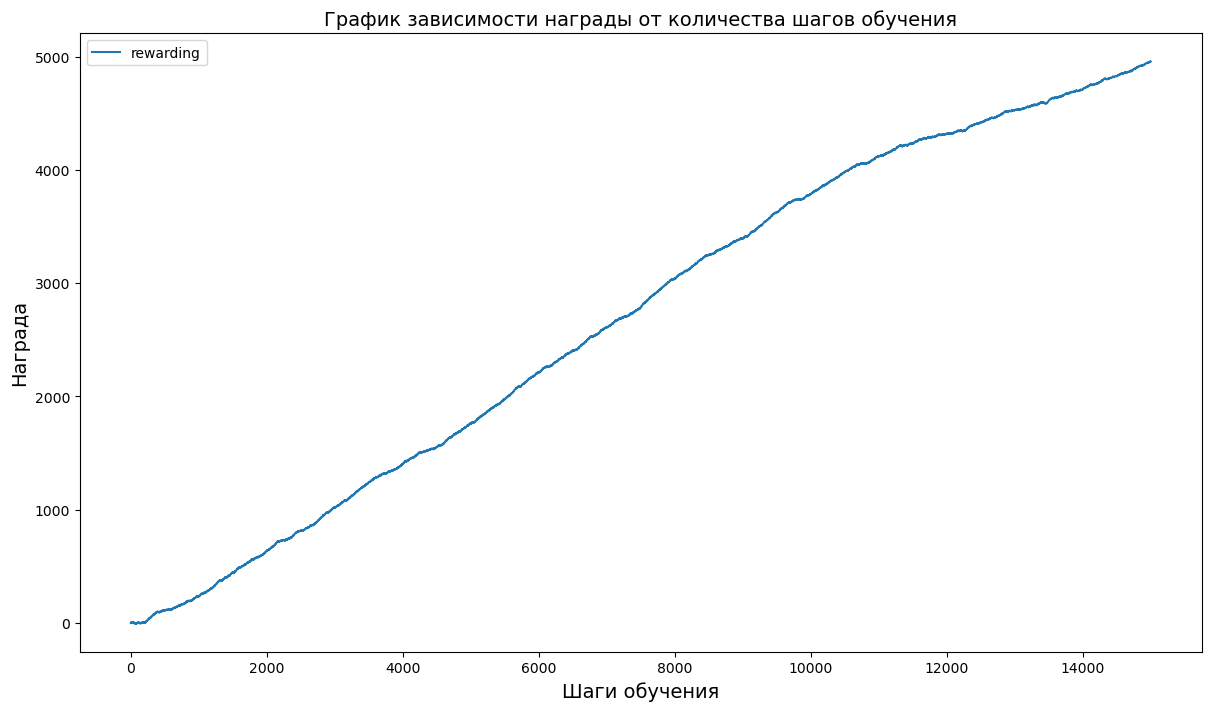

In [94]:
x = np.linspace(0, 15000, num=15001)

fig, ax = plt.subplots(figsize=(12,7), layout='constrained')
ax.plot(x, st.reward1, label='rewarding')
ax.set_xlabel('Шаги обучения', size=14)
ax.set_ylabel('Награда', size=14)
ax.set_title('График зависимости награды от количества шагов обучения', size=14)
ax.legend()
plt.savefig('Rewarding plot')

In [95]:
player_one.savePolicy()
player_two.savePolicy()

In [96]:
player_one.loadPolicy("policy_p1")

# Игра с компьютером

In [97]:
## player_one = Player("Компьютер", exp_rate=0)
player_one.loadPolicy("policy_p1")

player_two = HumanPlayer(input("Введите ваше имя:"))

st = State(player_one, player_two)
st.play2()

Введите ваше имя:
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   |   | x | 
-------------
Номер строки:2
Номер столбца:0
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
| o |   | x | 
-------------
-------------
|   |   | x | 
-------------
|   |   |   | 
-------------
| o |   | x | 
-------------
Номер строки:1
Номер столбца:2
-------------
|   |   | x | 
-------------
|   |   | o | 
-------------
| o |   | x | 
-------------
-------------
| x |   | x | 
-------------
|   |   | o | 
-------------
| o |   | x | 
-------------
Номер строки:1
Номер столбца:1
-------------
| x |   | x | 
-------------
|   | o | o | 
-------------
| o |   | x | 
-------------
-------------
| x | x | x | 
-------------
|   | o | o | 
-------------
| o |   | x | 
-------------
Первый игрок выиграл!
